# Graph Mining

## 📚 Exercise 1
Complete the function `compute_modularity` to compute the modularity measure of a given graph.

### Goal:
1. Visualizing two graphs using `networkx` (the Karate Club graph is currently commented out in the code)
2. Completing `compute_modularity` function that aims to measure modularity of a given graph

### What you are learning in this exercise:
1. Getting familiar with `networkx` library.
2. Analyzing modularity measure for different graph inputs

#### Hint: you can install `networkx` package by running the following command in a  notebook cell: `!conda install networkx --yes `

In [3]:
! pip install networkx

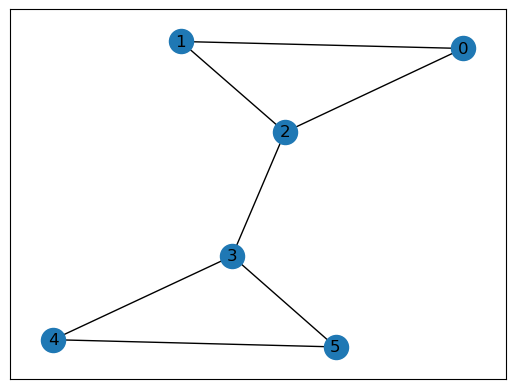

In [6]:
import networkx as nx
import numpy as np
%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

#G = nx.karate_club_graph()
#nx.draw_networkx(G)

In [7]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1

In [16]:
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G):
    m = len(G.edges)
    Q = 0
    c1_nodes = [node for node in G.nodes if G.nodes[node]['community'] == 0]
    c2_nodes = [node for node in G.nodes if G.nodes[node]['community'] == 1]
    for node1 in c1_nodes:
        for node2 in c2_nodes:
            Q += (node1 in G.neighbors(node2)) - G.degree[node1] * G.degree[node2] / (2 * m)
    return Q/(2*m)

In [17]:
compute_modularity(G)

-0.17857142857142852

## 📚 Exercise 2
Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.

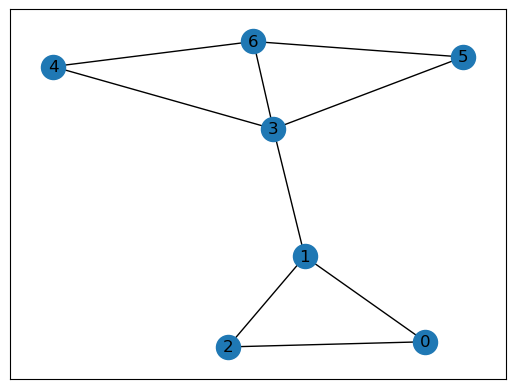

In [64]:
M = ["0,1,2",
"1,0,2,3",
"2,0,1",
"3,1,4,5,6",
"4,3,6",
"5,3,6",
"6,3,4,5"
]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)